### Comparing different portfolios 

##### Working on Whale, S&PTSX and Algorithmic portfolios 
------------

In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
%matplotlib inline

In [565]:
# Imported all the required libraries 

In [566]:
pwd

'/Users/omarismail/Documents/python/Starter_Code'

In [567]:
# Findigns the assigned paths 

In [568]:
algo_returns_path = Path('Resources/algo_returns.csv')
l_historical_path = Path('Resources/l_historical.csv')
otex_historical_path = Path('Resources/otex_historical.csv')
shop_historical_path = Path('Resources/shop_historical.csv')
sp_tsx_history_path= Path('Resources/sp_tsx_history.csv')
whale_returns_path = Path('Resources/whale_returns.csv')

In [569]:
# Reading the assigned paths 

In [570]:
algo_returns = pd.read_csv(algo_returns_path,parse_dates=True, infer_datetime_format=True)
l_historical = pd.read_csv(l_historical_path,parse_dates=True, infer_datetime_format=True)
otex_historical = pd.read_csv(otex_historical_path,parse_dates=True, infer_datetime_format=True)
shop_historical = pd.read_csv(shop_historical_path,parse_dates=True, infer_datetime_format=True)
sp_tsx_history = pd.read_csv(sp_tsx_history_path,parse_dates=True, infer_datetime_format=True)
whale_returns = pd.read_csv(whale_returns_path,parse_dates=True, infer_datetime_format=True)

In [571]:
# Checking each csv file contents 
# Setting the datetime as indexes 
# Removing the "Date" as the extra column

In [572]:
algo_returns.head(3)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN


In [573]:
algo_returns.set_index(pd.to_datetime(algo_returns['Date'],infer_datetime_format=True), inplace=True)

In [574]:
algo_returns.drop(columns=['Date'],inplace=True)

In [575]:
l_historical.set_index(pd.to_datetime(l_historical['Date'],infer_datetime_format=True), inplace=True)

In [576]:
l_historical.drop(columns=['Date'],inplace=True)

In [577]:
otex_historical.head()

,Symbol,Date,Close
0,OTEX,1/2/2018,43.58
1,OTEX,1/3/2018,43.07
2,OTEX,1/4/2018,42.91
3,OTEX,1/5/2018,42.57
4,OTEX,1/8/2018,42.16


In [578]:
otex_historical.set_index(pd.to_datetime(otex_historical['Date'],infer_datetime_format=True), inplace=True)

In [579]:
otex_historical.drop(columns=['Date'],inplace=True)

In [580]:
shop_historical.head(3)

,Symbol,Date,Close
0,SHOP,1/2/2018,132.06
1,SHOP,1/3/2018,135.15
2,SHOP,1/4/2018,137.46


In [581]:
shop_historical.set_index(pd.to_datetime(shop_historical['Date'],infer_datetime_format=True), inplace=True)

In [582]:
shop_historical.drop(columns=['Date'],inplace=True)

In [583]:
sp_tsx_history.head(3)

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"


In [584]:
sp_tsx_history.set_index(pd.to_datetime(sp_tsx_history['Date'],infer_datetime_format=True), inplace=True)

In [585]:
sp_tsx_history.drop(columns=['Date'],inplace=True)

In [586]:
# Removing the $ sign

In [587]:
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$','')

/var/folders/zh/nww2ym3x0cbfytq7xxn20z7w0000gn/T/ipykernel_941/3876749617.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$','')


In [588]:
sp_tsx_history.head()

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [589]:
whale_returns.head(3)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [590]:
whale_returns.set_index(pd.to_datetime(whale_returns['Date'],infer_datetime_format=True), inplace=True)

In [591]:
whale_returns.drop(columns=['Date'],inplace=True)

In [592]:
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [593]:
l_historical.dtypes

Symbol     object
Close     float64
dtype: object

In [594]:
otex_historical.dtypes

Symbol     object
Close     float64
dtype: object

In [595]:
shop_historical.dtypes

Symbol     object
Close     float64
dtype: object

In [596]:
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [597]:
sp_tsx_history.dtypes

Close    object
dtype: object

In [598]:
sp_tsx_history

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"
...,...
2019-12-20,"17,118.44"
2019-12-23,"17,128.71"
2019-12-24,"17,180.15"


In [599]:
# Changing the value to Float (Failed the inital attempt to remove the $ sign so had to re do it in differnt format)

In [600]:
sp_tsx_history['Close'] = sp_tsx_history['Close'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [601]:
sp_tsx_history.dtypes

Close    float64
dtype: object

In [602]:
# Dropping all Nulls from all files 

In [603]:
algo_returns.dropna(inplace=True)
l_historical.dropna(inplace=True)
otex_historical.dropna(inplace=True)
shop_historical.dropna(inplace=True)
sp_tsx_history.dropna(inplace=True)
whale_returns.dropna(inplace=True)

In [604]:
# Calculating the S&PTSX daily returns and changing the cloumns name 

In [605]:
sp_tsx_history_drtn = sp_tsx_history.pct_change()

In [606]:
sp_tsx_history_drtn.columns = ['S&PTSX']

In [607]:
#Joining all portfolios and plotting their daily returns 

In [608]:
combined_port = pd.concat([whale_returns,algo_returns,sp_tsx_history_drtn],axis='columns', join='inner')

In [609]:
combined_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&PTSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [610]:
# Plotting those portfolios 

<AxesSubplot:xlabel='Date'>

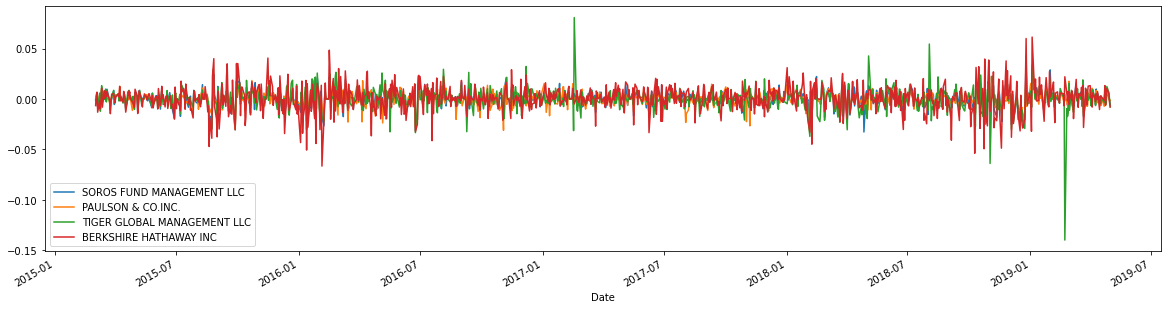

In [611]:
whale_returns.plot(figsize=(20,5))

<AxesSubplot:xlabel='Date'>

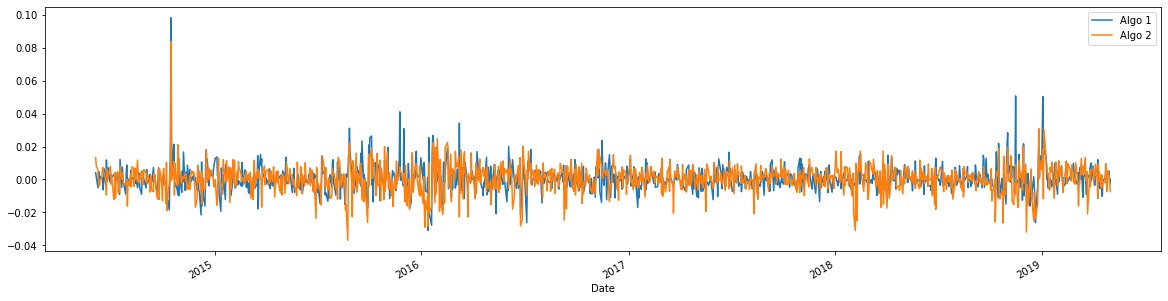

In [612]:
algo_returns.plot(figsize=(20,5))

<AxesSubplot:xlabel='Date'>

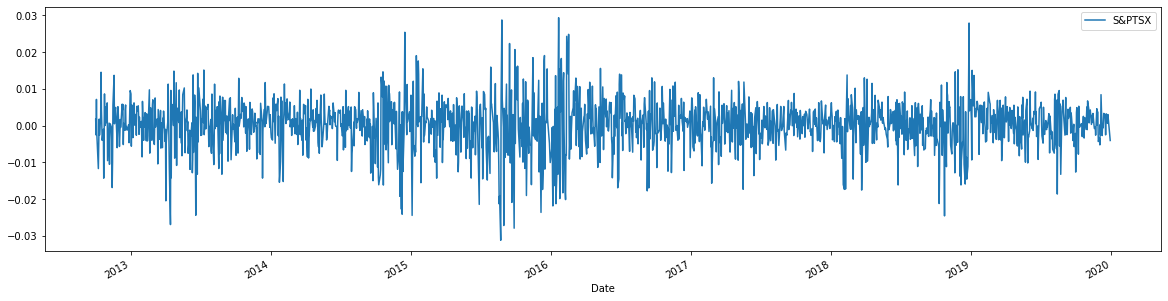

In [613]:
sp_tsx_history_drtn.plot(figsize=(20,5))

<AxesSubplot:xlabel='Date'>

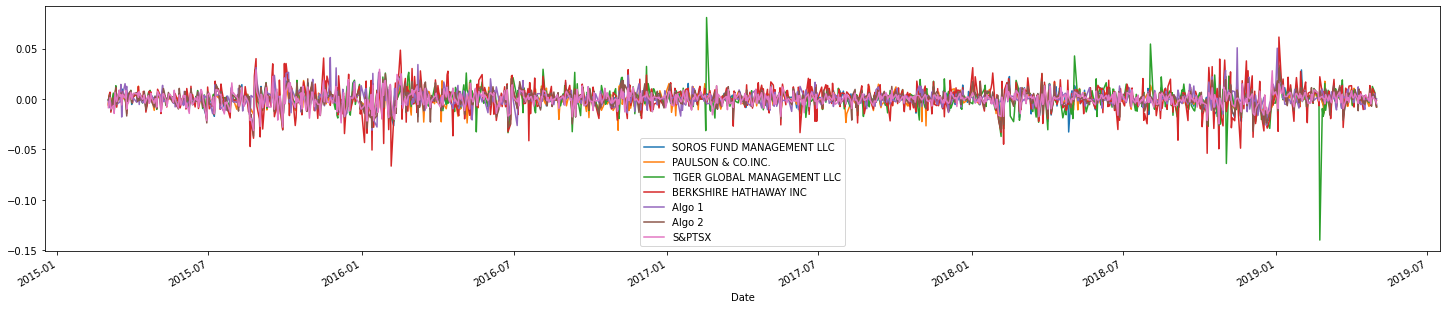

In [614]:
combined_port.plot(figsize=(25,5))

In [ ]:
# Calculating the cumulitive returns

In [615]:
whale_returns_cumulative = (whale_returns + 1).cumprod()

<AxesSubplot:xlabel='Date'>

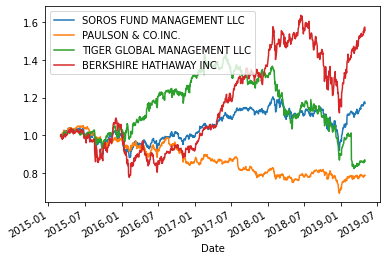

In [616]:
whale_returns_cumulative.plot()

In [617]:
sp_tsx_history_drtn_cumulative = (sp_tsx_history_drtn + 1).cumprod()

<AxesSubplot:xlabel='Date'>

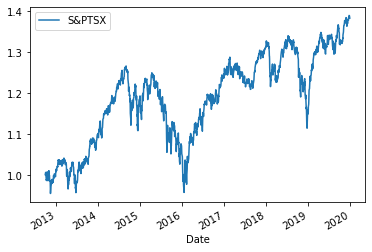

In [618]:
sp_tsx_history_drtn_cumulative.plot()

In [619]:
algo_returns_cumulative = (algo_returns + 1).cumprod()

<AxesSubplot:xlabel='Date'>

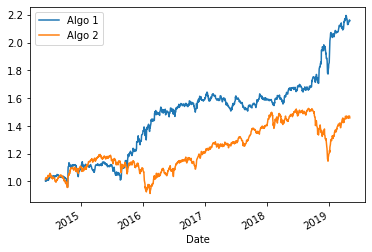

In [620]:
algo_returns_cumulative.plot()

In [621]:
combined_port_cumulative = (combined_port + 1).cumprod()

In [622]:
import matplotlib.pyplot as plt

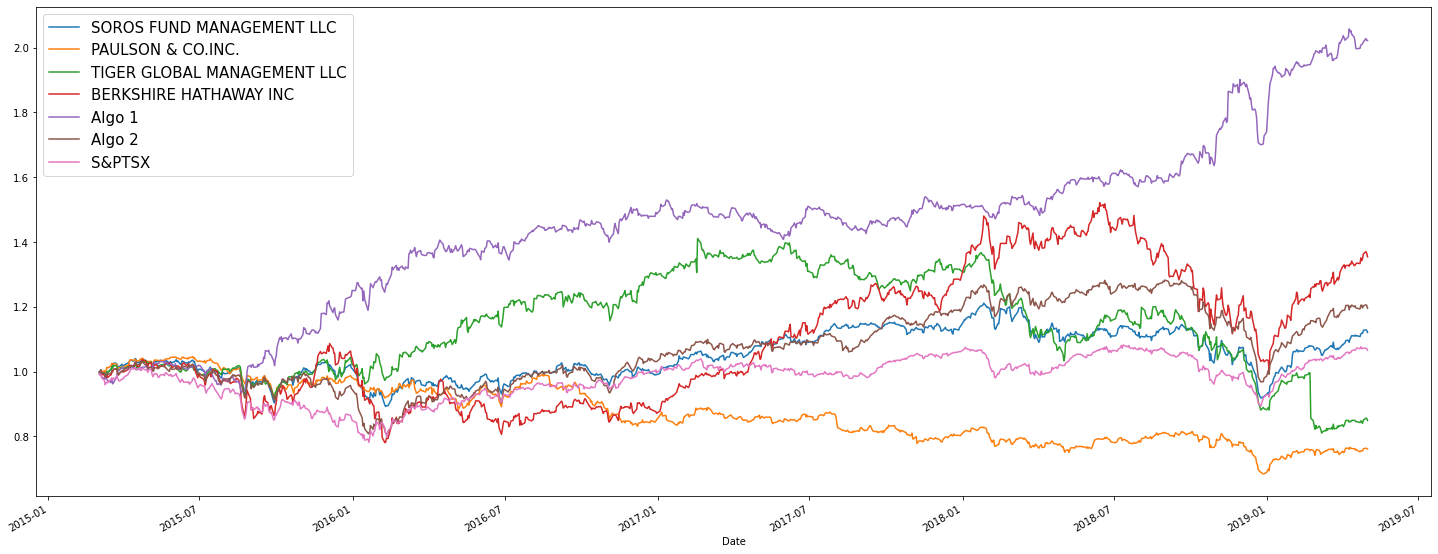

In [623]:
combined_port_cumulative.plot(figsize=(25,10))
plt.legend(fontsize=15)

In [624]:
# All portfolios except two are outperforming the S&PTSX

In [625]:
#Calculating std for each portfolio 

In [626]:
combined_std = combined_port.std()

In [627]:
combined_std_annual = combined_port.std() * np.sqrt(252)

In [628]:
combined_std_annual

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&PTSX                         0.111664
dtype: float64

In [629]:
# Calculating the rolling std for 21 days for all portfolios 

<AxesSubplot:xlabel='Date'>

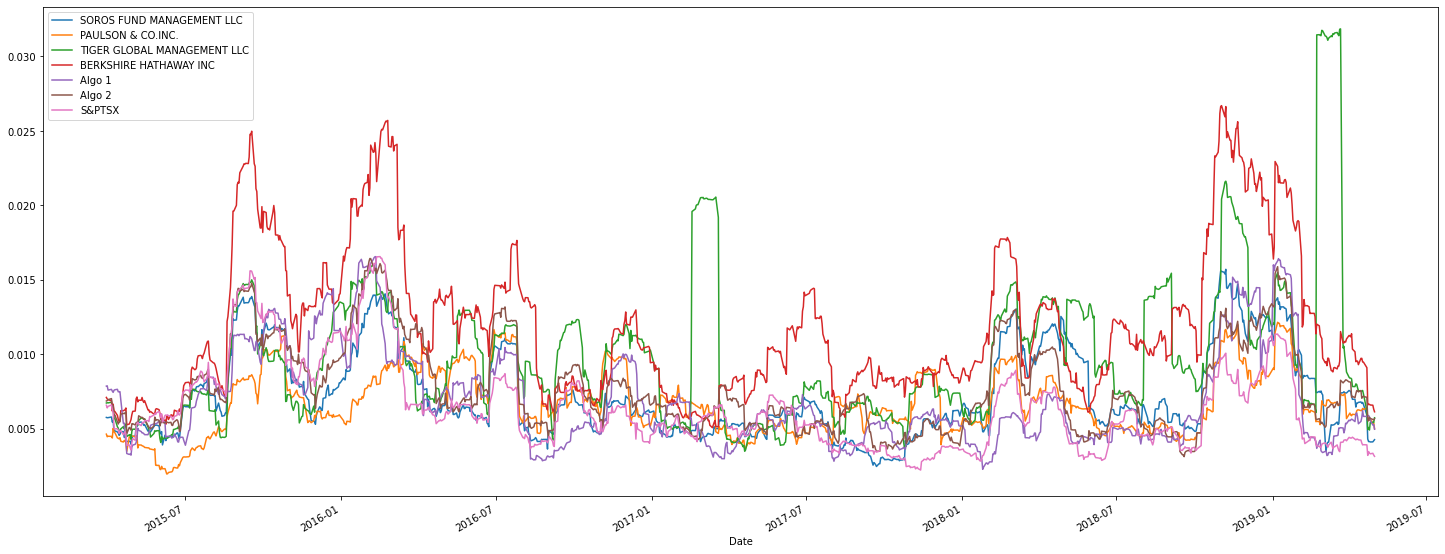

In [630]:
combined_port.rolling(window=21).std().plot(figsize=(25,10))

In [631]:
#Calculate the correlation between each stock and SPTSX

<AxesSubplot:>

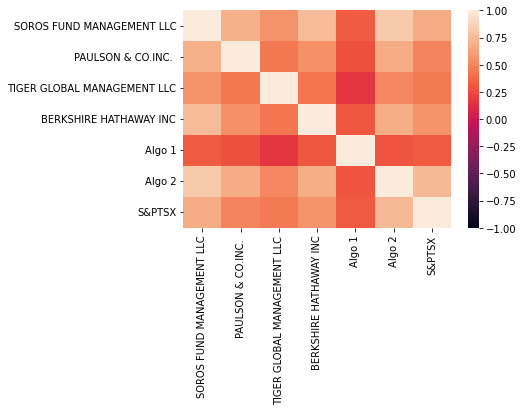

In [632]:
correlation = combined_port.corr()
sns.heatmap(correlation, vmin=-1,vmax=1)

In [633]:
# Calculating the 60 days rolling beta between Algo 2 portfolio and S&PTSX

In [634]:
variance = sp_tsx_history_drtn.var()

In [635]:
variance

S&PTSX    0.000044
dtype: float64

In [636]:
algo_returns.head(3)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [637]:
sp_tsx_history_drtn.head(3)

,S&PTSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563


In [638]:
covariance=algo_returns['Algo 2'].cov(sp_tsx_history_drtn['S&PTSX'])

In [639]:
covariance

4.284786214739706e-05

In [640]:
# Calculate beta of Algo1 daily returns 
algo2_beta = covariance/variance
algo2_beta

S&PTSX    0.972609
dtype: float64

In [641]:
# Calculate 60 days rolling covariance of Algo1 vs S&PTSX 

<AxesSubplot:title={'center':'Rolling 60 days Covariance of Algo2 vs. S&PTSX'}, xlabel='Date'>

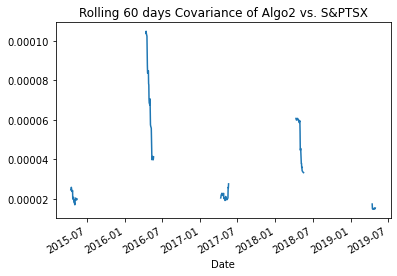

In [642]:
rolling_covariance = algo_returns['Algo 2'].rolling(window=60).cov(sp_tsx_history_drtn['S&PTSX'])
rolling_covariance.plot(title='Rolling 60 days Covariance of Algo2 vs. S&PTSX')

<AxesSubplot:title={'center':'Rolling 60 days Variance of S&PTSX'}, xlabel='Date'>

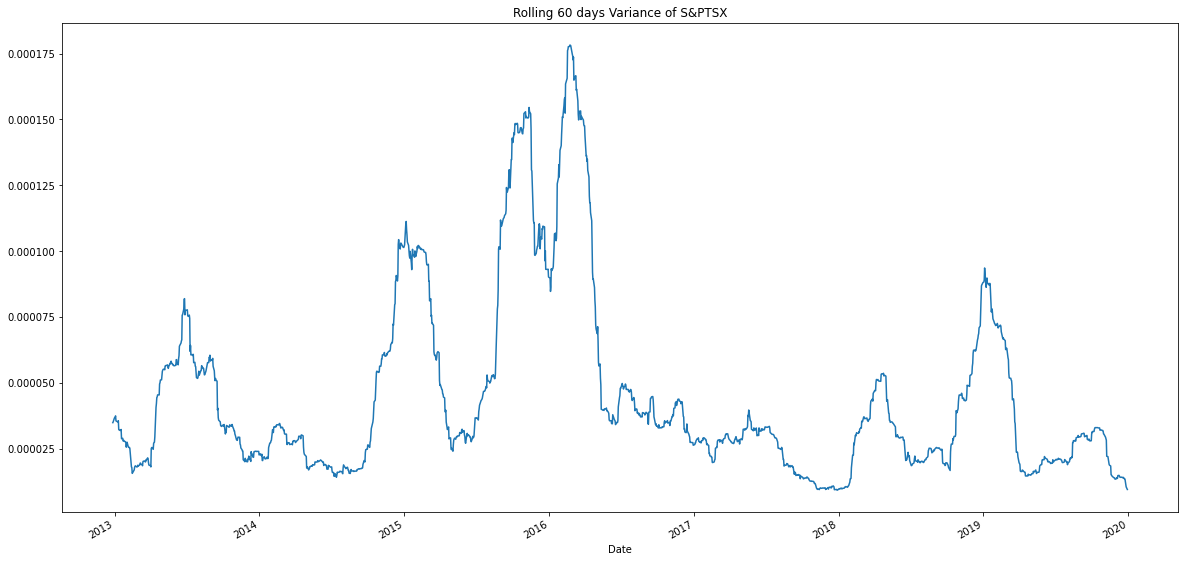

In [643]:
rolling_variance = sp_tsx_history_drtn['S&PTSX'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60 days Variance of S&PTSX')

<AxesSubplot:title={'center':'Rolling 60 Days Beta of Algo2'}, xlabel='Date'>

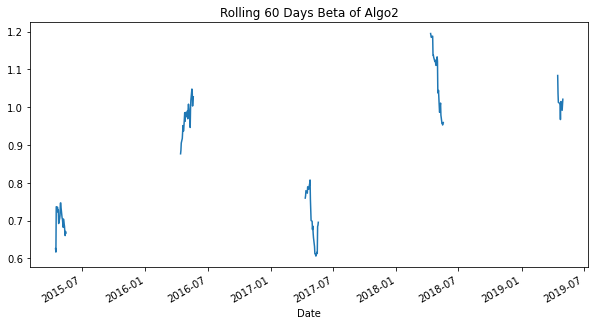

In [644]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(10, 5), title='Rolling 60 Days Beta of Algo2')

In [645]:
sp_tsx_history_drtn.ewm(halflife=21,adjust=True)

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [646]:
# Calcualting Sharpe ratios 

In [647]:
sharpe_ratios = (combined_port.mean() * 252) / (combined_std * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&PTSX                         0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

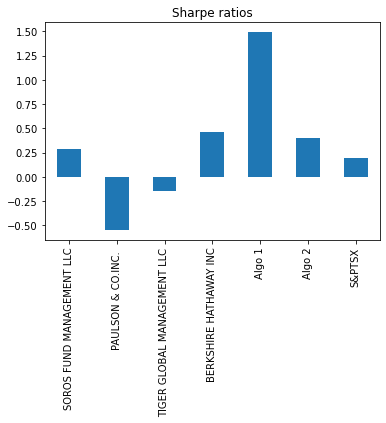

In [648]:
sharpe_ratios.plot.bar(title='Sharpe ratios')

In [649]:
# The algo1 and algo2 outperformed the S&PTSX

##### My portfolios vs other portfolios 

In [650]:
# Personal portfolios 
# Three companies: AMZN, GOOG, AMZN
# Assigning the paths
# Reading the files, downloaded from google sheets

In [651]:
pwd

'/Users/omarismail/Documents/python/Starter_Code'

In [652]:
amzn_path = Path('Resources/amzn.csv')
goog_path = Path('Resources/goog_2.csv')
tsla_path = Path('Resources/tsla_2.csv')

In [653]:
amzn = pd.read_csv(amzn_path,parse_dates=True, infer_datetime_format=True) 
goog = pd.read_csv(goog_path,parse_dates=True, infer_datetime_format=True)
tsla = pd.read_csv(tsla_path,parse_dates=True, infer_datetime_format=True)

In [654]:
# Setting the dates as indexes and dropping the extra date columns and then checking the results 

In [655]:
amzn.set_index(pd.to_datetime(amzn['date'],infer_datetime_format=True), inplace=True)
goog.set_index(pd.to_datetime(goog['date'],infer_datetime_format=True), inplace=True)
tsla.set_index(pd.to_datetime(tsla['date'],infer_datetime_format=True), inplace=True)

In [656]:
amzn.drop(columns=['Date','date'],inplace=True)
goog.drop(columns=['Date','date'],inplace=True)
tsla.drop(columns=['Date','date'],inplace=True)

In [657]:
tsla

,Close
date,
2015-12-01,47.44
2015-12-02,46.40
2015-12-03,46.54
2015-12-04,46.08
2015-12-07,46.23
...,...
2022-01-24,930.00
2022-01-25,918.40
2022-01-26,937.41


In [658]:
amzn

,Close
date,
2015-12-01,679.06
2015-12-02,676.01
2015-12-03,666.25
2015-12-04,672.64
2015-12-07,669.83
...,...
2022-01-24,2890.88
2022-01-25,2799.72
2022-01-26,2777.45


In [659]:
tsla

,Close
date,
2015-12-01,47.44
2015-12-02,46.40
2015-12-03,46.54
2015-12-04,46.08
2015-12-07,46.23
...,...
2022-01-24,930.00
2022-01-25,918.40
2022-01-26,937.41


In [660]:
# Renaming the columns

In [661]:
amzn.columns = ['AMZN']
goog.columns = ['GOOG']
tsla.columns = ['TSLA']

In [662]:
# Calculating the daily returns 

In [663]:
amzn_rtn = amzn.pct_change()

In [664]:
goog_rtn = goog.pct_change()

In [665]:
tsla_rtn = tsla.pct_change()

In [666]:
tsla_rtn

,TSLA
date,
2015-12-01,NaN
2015-12-02,-0.021922
2015-12-03,0.003017
2015-12-04,-0.009884
2015-12-07,0.003255
...,...
2022-01-24,-0.014726
2022-01-25,-0.012473
2022-01-26,0.020699


In [667]:
amzn_rtn

,AMZN
date,
2015-12-01,NaN
2015-12-02,-0.004492
2015-12-03,-0.014438
2015-12-04,0.009591
2015-12-07,-0.004178
...,...
2022-01-24,0.013327
2022-01-25,-0.031534
2022-01-26,-0.007954


In [668]:
goog_rtn

,GOOG
date,
2015-12-01,NaN
2015-12-02,-0.006075
2015-12-03,-0.012907
2015-12-04,0.018962
2015-12-07,-0.004643
...,...
2022-01-24,0.002152
2022-01-25,-0.027893
2022-01-26,0.019762


In [669]:
# Joining all three stocks data as My portfolio 

In [670]:
my_portfolio = pd.concat([amzn_rtn,goog_rtn,tsla_rtn], axis = 'columns', join='inner')

In [671]:
my_portfolio

,AMZN,GOOG,TSLA
date,,,
2015-12-01,NaN,NaN,NaN
2015-12-02,-0.004492,-0.006075,-0.021922
2015-12-03,-0.014438,-0.012907,0.003017
2015-12-04,0.009591,0.018962,-0.009884
2015-12-07,-0.004178,-0.004643,0.003255
...,...,...,...
2022-01-24,0.013327,0.002152,-0.014726
2022-01-25,-0.031534,-0.027893,-0.012473
2022-01-26,-0.007954,0.019762,0.020699


In [672]:
combined_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&PTSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [673]:
# Joining my portfolio

In [674]:
all_portfolios = pd.concat([my_portfolio,combined_port], axis='columns', join='inner')

In [675]:
all_portfolios

,AMZN,GOOG,TSLA,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&PTSX
2015-12-01,NaN,NaN,NaN,0.004271,0.010081,0.009055,0.010649,0.030832,0.003599,0.012341
2015-12-02,-0.004492,-0.006075,-0.021922,-0.007471,-0.007103,-0.016163,0.011200,-0.001818,-0.006903,-0.012631
2015-12-03,-0.014438,-0.012907,0.003017,-0.012023,-0.007407,-0.018869,-0.015716,0.007114,-0.013703,-0.010335
2015-12-04,0.009591,0.018962,-0.009884,0.008003,0.007254,0.012094,0.022917,-0.012095,0.008607,0.002559
2015-12-07,-0.004178,-0.004643,0.003255,-0.011234,-0.002763,-0.009608,-0.011713,-0.013882,-0.016038,-0.023650
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.000263,0.005932,-0.042529,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.025433,0.006910,-0.050474,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,-0.006254,0.012105,0.026791,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.006144,-0.076966,-0.011390,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183


In [676]:
# Calculating all portfolios annualized STD

In [677]:
all_portfolios_std = all_portfolios.std()

In [678]:
all_portfolios_std_annual = all_portfolios.std() * np.sqrt(252)

In [679]:
all_portfolios_std_annual

AMZN                           0.289697
GOOG                           0.219674
TSLA                           0.452201
SOROS FUND MANAGEMENT LLC      0.123696
PAULSON & CO.INC.              0.113945
TIGER GLOBAL MANAGEMENT LLC    0.181791
BERKSHIRE HATHAWAY INC         0.204173
Algo 1                         0.116827
Algo 2                         0.131205
S&PTSX                         0.103949
dtype: float64

In [680]:
# Calculating the rolling std of 21 days for all portfolios 

<AxesSubplot:>

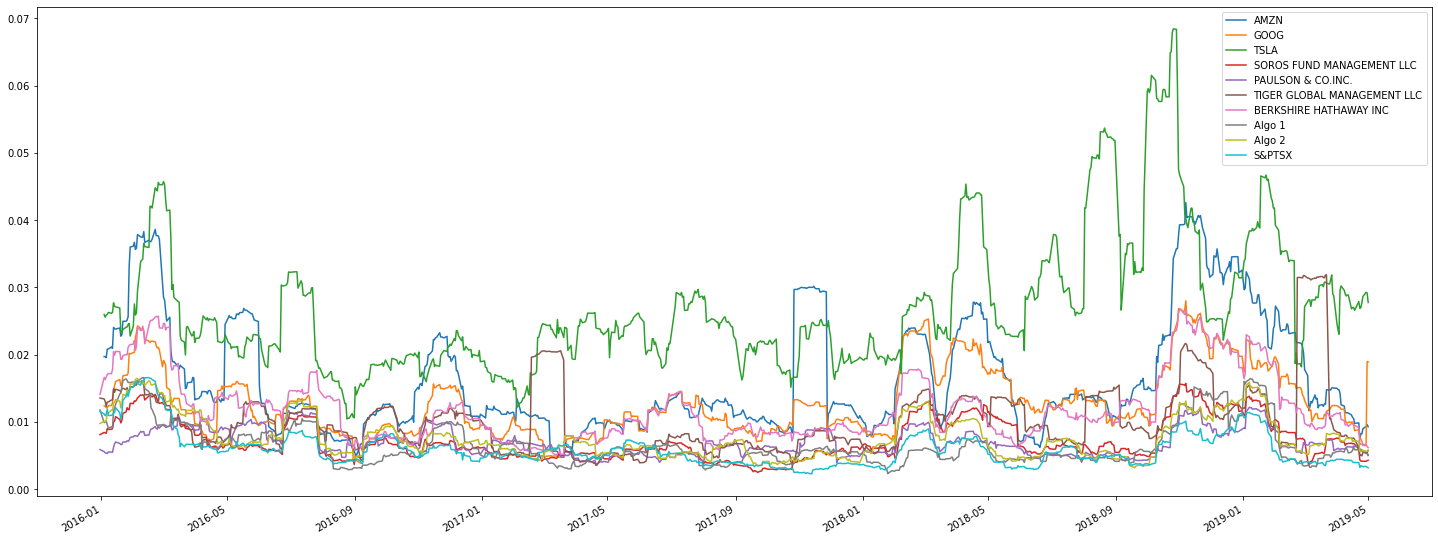

In [681]:
all_portfolios.rolling(window=21).std().plot(figsize=(25,10))

In [682]:
# Findings the correlation of all portfolios and heatmap it 

In [683]:
all_correlation = all_portfolios.corr()

<AxesSubplot:>

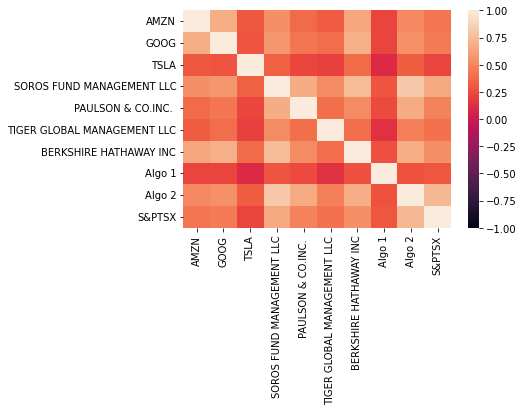

In [684]:
sns.heatmap(all_correlation, vmin=-1, vmax=1)

In [685]:
# Calculating beta of my portfolios against the market
# Calculating the Variance of S&PTSX and the covariance of my portfolio 


In [686]:
variance = sp_tsx_history_drtn['S&PTSX'].var()
variance

4.405458170898365e-05

In [687]:
covariance_my = my_portfolio['GOOG'].cov(sp_tsx_history_drtn['S&PTSX'])
covariance_my

3.925928258668179e-05

In [688]:
covariance_my = my_portfolio['AMZN'].cov(sp_tsx_history_drtn['S&PTSX'])
covariance_my

4.6991037785602614e-05

In [689]:
covariance_my = my_portfolio['TSLA'].cov(sp_tsx_history_drtn['S&PTSX'])
covariance_my

4.347195730375e-05

In [690]:
#Couldnt calculate the covariane of all of my portfolio at once, had to do each stock in a time

<AxesSubplot:>

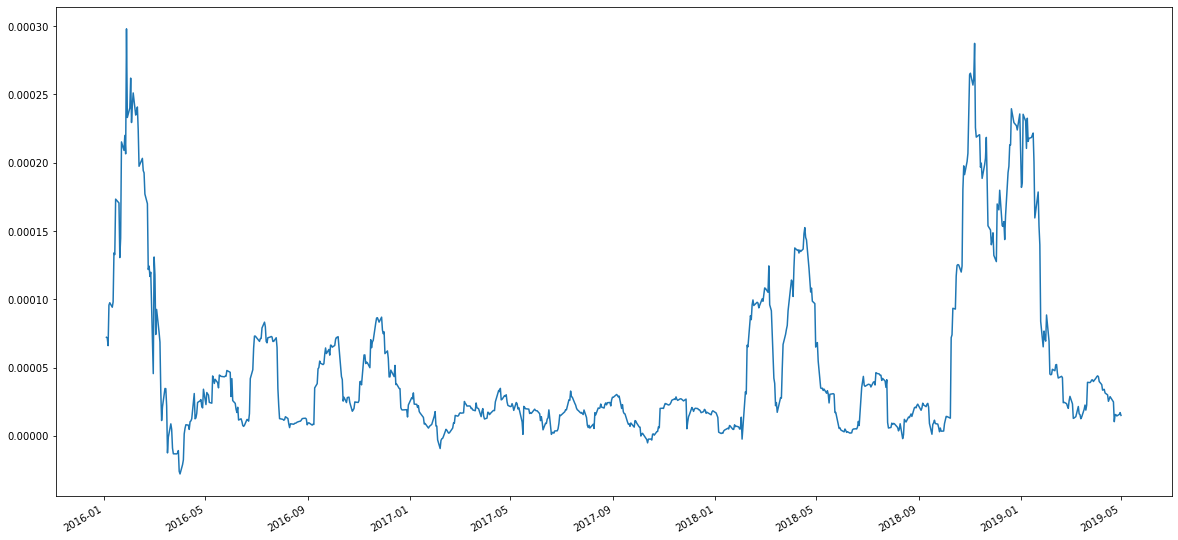

In [691]:
rolling_covariance = all_portfolios['AMZN'].rolling(window=21).cov(all_portfolios['S&PTSX'])
rolling_covariance.plot(figsize=(20, 10))

In [692]:
#Calculating the sharpe ratio

In [693]:
sharpe_ratios_my= (all_portfolios.mean() * 252) / (all_portfolios_std * np.sqrt(252))
sharpe_ratios_my

AMZN                           1.041041
GOOG                           0.526353
TSLA                           0.255759
SOROS FUND MANAGEMENT LLC      0.268457
PAULSON & CO.INC.             -0.596860
TIGER GLOBAL MANAGEMENT LLC   -0.220017
BERKSHIRE HATHAWAY INC         0.466953
Algo 1                         1.445860
Algo 2                         0.528616
S&PTSX                         0.605640
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

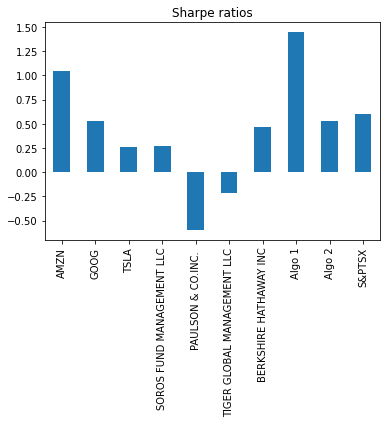

In [694]:
sharpe_ratios_my.plot.bar(title='Sharpe ratios')